# PS1-1 Linear Classifier (Logistic Regression & GDA)

## b. Coding Problem

### 1. Import Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import CS229.cs229_learning.problem_sets.PS1.src.util as util
from CS229.cs229_learning.problem_sets.PS1.src.linear_model import LinearModel

### 2. Load Dataset

In [4]:
x_train, y_train = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds1_train.csv', add_intercept = True)
x_valid, y_valid = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds1_valid.csv', add_intercept = True)

### 3. Plot the training set

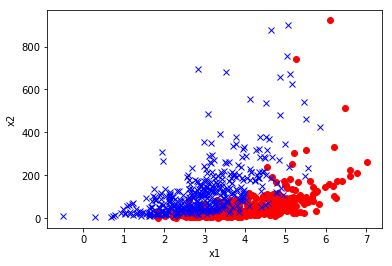

In [5]:
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[y_train == 1, 1], x_train[y_train == 1, 2] , 'ro', linewidth = 2) #_train[y_train == 1, 1] = for all row that have y = 1, take the 1st column (0th column is 1 because of add intercept)
plt.plot(x_train[y_train == 0, 1], x_train[y_train == 0, 2], 'bx', linewidth = 2)
plt.show()

### 4. Implement Logistic Regression using Newton Method

In [6]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    #Initialize Constructor
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.theta = None
        self.x = None
        self.y = None

    #Fit data to the Model
    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:++
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        #1. Get feature shape
        m, n = x.shape

        #2. Initialize theta value
        if (self.theta is None):
            self.theta = np.zeros(n)

        #3. Apply Formular
        ##METHOD 1: NEWTON'S METHOD
        # Sigmoid Function
        def sigmoid(x, theta):
            return 1 / (1 + np.exp(- x @ theta))

        # Gradient (Derivative of Cost Function)
        def gradient(x, y, theta):
            g = sigmoid(x, theta).reshape(-1, 1)
            return (x.T @ (g - y.reshape(-1, 1))) / m

        #Hessian matrix
        def hessian_matrix(x, theta):
            g = sigmoid(x, theta).reshape(-1, 1)
            return 1 / m * x.T @ (x * g * (1 - g))

        #Apply formular
        theta_old = np.ones(n)
        while np.linalg.norm(theta_old - self.theta, 1) >= self.eps:
            self.theta = self.theta.reshape(-1, 1)
            theta_old = self.theta.copy()
            self.theta -= np.linalg.inv(hessian_matrix(x, self.theta)) @ gradient(x, y, self.theta)

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        g = 1 / (1 + np.exp(- x @ self.theta))
        return g >= 0.5


### 5. Training Model

In [7]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
print("Theta: ", clf.theta)

Theta:  [[-6.26018491]
 [ 2.47707251]
 [-0.0299125 ]]


### 6. Predict Phase

In [8]:
y_train_pred = clf.predict(x_train)
y_valid_pred = clf.predict(x_valid)

### 7. Report Accuracy

In [9]:
def accuracy_log(y_true, y_pred):
    sum_correct = 0
    for i in range(len(y_true)):
        if(y_pred[i] == y_true[i]):
            sum_correct += 1
    return sum_correct / len(y_true)

In [10]:
accuracy_train = accuracy_log(y_train, y_train_pred)
print("TRAIN: Accuracy: ", accuracy_train)

TRAIN: Accuracy:  0.8825


In [11]:
accuracy_valid = accuracy_log(y_valid, y_valid_pred)
print("VALID: Accuracy: ", accuracy_valid)

VALID: Accuracy:  0.9


### 8. Plot the model prediction

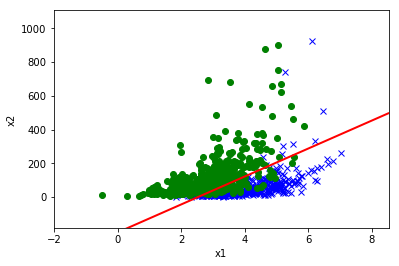

In [12]:
util.plot(x_train, y_train, theta=clf.theta)
plt.show()

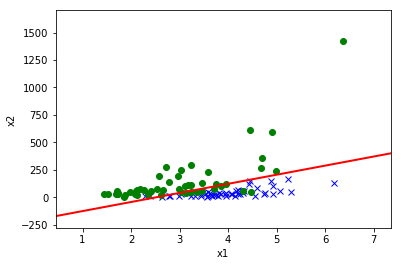

In [13]:
util.plot(x_valid, y_valid, theta=clf.theta)
plt.show()

## e. Coding Problem

### 1. Import Library

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import CS229.cs229_learning.problem_sets.PS1.src.util as util
from CS229.cs229_learning.problem_sets.PS1.src.linear_model import LinearModel

### 2. Load Dataset

In [15]:
x_train, y_train = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds1_train.csv')
x_valid, y_valid = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds1_valid.csv')

### 3. Plot traning set

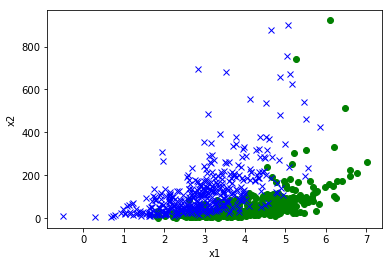

In [16]:
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1] , 'go', linewidth = 2)
plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1] , 'bx', linewidth = 2)
plt.show()

### 4. Implement GDA Algorithm

In [17]:
class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > gda = GDA()
        > gda.fit(x_train, y_train)
        > gda.predict(x_eval)
    """
    #Initialize Constructor
    def __init__(self):
        super(GDA, self).__init__()
        self.phi = None
        self.cov = None
        self.muy_0 = None
        self.muy_1 = None
        self.theta = None
        self.theta_0 = None
        self.x = None
        self.y = None

    #Fit data to the model
    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        #1. Get x feature:
        m, n = x.shape

        #2. Initialize parameter value:
        if (self.phi is None) and (self.cov is None) and (self.muy_0 is None) and (self.muy_1 is None) and (self.theta is None) and (self.theta_0 is None):
            self.phi = 0 #phi in R
            self.cov = np.zeros((n , n)) #cov in Rnn
            self.muy_0 = np.zeros(n) #muy_0 in Rn
            self.muy_1 = np.zeros(n) #muy_1 in Rn
            self.theta = np.zeros(n) #theta is Rn
            self.theta_0 = np.zeros(n) #theta_0 is Rn

        #3. Apply formular (derivative of each parameter is 0):
        #phi
        def phi_new():
            sum = 0
            for i in range(len(y_train)):
                if(y_train[i] == 1):
                    sum += 1
            return sum / m

        #muy_0
        def muy_0_new(x):
            sum_x_i = 0
            sum_0 = 0
            for i in range(len(y_train)):
                if(y_train[i] == 0):
                    sum_x_i += x[i]
                    sum_0 += 1
            return sum_x_i / sum_0

        #muy_1
        def muy_1_new(x):
            sum_x_i = 0
            sum_1 = 0
            for i in range(len(y_train)):
                if(y_train[i] == 1):
                    sum_x_i += x[i]
                    sum_1 += 1
            return sum_x_i / sum_1

        #cov
        def cov_new(x, y):
            #initialize new value of cov
            sum_cov = np.zeros((n, n))

            for i in range(len(y)):
                if(y[i] == 0):
                    diff_0 = (x[i] - self.muy_0).reshape(-1, 1)
                    sum_cov += diff_0 * diff_0.T
                if(y[i] == 1):
                    diff_1 = (x[i] - self.muy_1).reshape(-1, 1)
                    sum_cov += diff_1 * diff_1.T
            return sum_cov / m

        #Update phi, muy_0, muy_1, cov
        self.phi = phi_new()
        self.cov = cov_new(x, y)
        self.muy_0 = muy_0_new(x)
        self.muy_1 = muy_1_new(x)

        #Initialize parameter theta and theta_0
        cov_inv = np.linalg.inv(self.cov)
        self.theta = cov_inv @ (self.muy_1  - self.muy_0)
        self.theta_0 = 1/2 * (((self.muy_0.T) @ cov_inv @ (self.muy_0)) - ((self.muy_1.T) @ cov_inv @ (self.muy_1))) - np.log((1 - self.phi) / self.phi)

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        #Predict phase
        h = 1 / (1 + np.exp(-(x @ (self.theta) + self.theta_0)))
        return h >= 0.5

### 5. Training Model

In [18]:
gda = GDA()
gda.fit(x_train, y_train)
print(np.insert(gda.theta, 0, gda.theta_0))

[-0.29285539  0.31388287 -0.00874089]


### 6. Predict Phase

In [19]:
y_train_pred = gda.predict(x_train)
y_valid_pred = gda.predict(x_valid)

### 7. Report Accuracy/MSE

In [20]:
def accuracy_gda(y_true, y_pred):
    sum_correct = 0
    for i in range(len(y_true)):
        if(y_pred[i] == y_true[i]):
            sum_correct += 1
    return sum_correct / len(y_true)

In [21]:
accuracy_train_gda = accuracy_gda(y_train, y_train_pred)
print("TRAIN: Accuracy GDA: ", accuracy_train_gda)

TRAIN: Accuracy GDA:  0.80625


In [22]:
accuracy_valid_gda = accuracy_gda(y_valid, y_valid_pred)
print("VALID: Accuracy GDA: ", accuracy_valid_gda)

VALID: Accuracy GDA:  0.8


### 8. Plot the Model Prediction

In [23]:
#Plot for No add_iterception
def gda_plot(x, y, theta_gda):
    #1. Initialize graph
    plt.figure()
    #2. Plot dataset
    plt.plot(x[y == 0, 0], x[y == 0, 1], 'bx', linewidth = 2, label="Class 0")
    plt.plot(x[y == 1, 0], x[y == 1, 1], 'go', linewidth = 2, label="Class 1")
    #3. Estimate range of graph
    margin_x_1 = (max(x[:, 0]) - min(x[:, 0])) * 0.2 # 20% range of x1 to create space around the graph
    margin_x_2 = (max(x[:, 1]) - min(x[:, 1])) * 0.2 # 20% range of x2 to create space around the graph
    x1 = np.linspace(min(x[:, 0])- margin_x_1, max(x[:, 0])+ margin_x_1, 200) #create 200 points between max x1 and min x1 to draw straight line more smooth

    #4. Draw boundary line
    x2_gda = - (theta_gda[0] / theta_gda[2]) - (theta_gda[1] / theta_gda[2]) * x1
    plt.plot(x1, x2_gda, c='red', linewidth=2, label="GDA")

    #5. Add information
    plt.xlim(x[:, 0].min()-margin_x_1, x[:, -2].max()+margin_x_1)
    plt.ylim(x[:, 1].min()-margin_x_2, x[:, -1].max()+margin_x_2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()

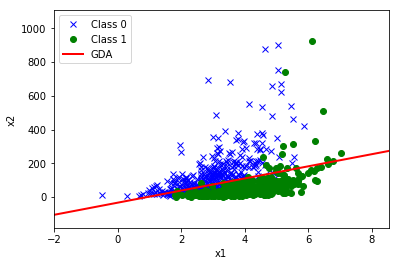

In [24]:
gda_plot(x_train, y_train, np.insert(gda.theta, 0, gda.theta_0))
plt.show()

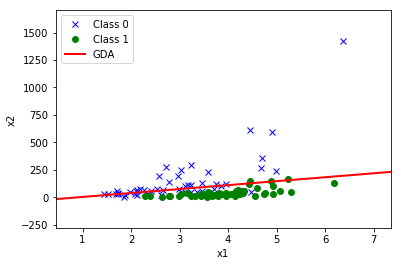

In [25]:
gda_plot(x_valid, y_valid, np.insert(gda.theta, 0, gda.theta_0))
plt.show()

## f. Coding Problem

### Compare Logistic Regression to GDA

In [26]:
def plot_comparison(x, y, theta_gda, theta_logistic):
    """Plot dataset with decision boundaries from GDA and Logistic Regression.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta_gda: Vector of parameters for GDA.
        theta_logistic: Vector of parameters for Logistic Regression.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    plt.figure()

    # Plot dataset
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'go', linewidth=2, label="Class 1")
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'bx', linewidth=2, label="Class 0")

    # Define x1 range for decision boundary
    margin1 = (max(x[:, -2]) - min(x[:, -2])) * 0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1])) * 0.2
    x1 = np.linspace(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 200)

    # Decision boundary for GDA
    x2_gda = -(theta_gda[0] / theta_gda[2] + theta_gda[1] / theta_gda[2] * x1)
    plt.plot(x1, x2_gda, c='red', linewidth=2, label="GDA Boundary")

    # Decision boundary for Logistic Regression
    x2_logistic = -(theta_logistic[0] / theta_logistic[2] + theta_logistic[1] / theta_logistic[2] * x1)
    plt.plot(x1, x2_logistic, c='black', linewidth=2, label="Logistic Boundary")

    # Set limits and labels
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

In [27]:
x_train, y_train = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds1_train.csv')
x_valid, y_valid = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds1_valid.csv')

In [28]:
gda = GDA()
gda.fit(x_train, y_train)

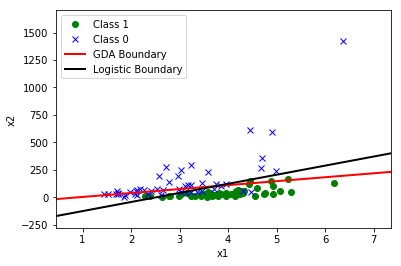

In [29]:
plot_comparison(x_valid, y_valid, theta_gda=np.insert(gda.theta, 0, gda.theta_0), theta_logistic=clf.theta)

## g. Coding Problem

### 1. Load dataset 2

#### GDA

In [30]:
x_train_2_gda, y_train_2_gda = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds2_train.csv')
x_valid_2_gda, y_valid_2_gda = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds2_valid.csv')

#### Logistic Regression

In [31]:
x_train_2, y_train_2 = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds2_train.csv', add_intercept=True)
x_valid_2, y_valid_2 = util.load_dataset('/home/anhnt02/Desktop/Basic_AI_Learning/CS229/cs229_learning/problem_sets/PS1/data/ds2_valid.csv', add_intercept=True)

### 2. Train with GDA and Logistic Regression

#### GDA

In [32]:
gda_2 = GDA()
gda_2.fit(x_train_2_gda, y_train_2_gda)

#### Logistic Regression

In [33]:
clf_2 = LogisticRegression()
clf_2.fit(x_train_2, y_train_2)

### 3. Predict with GDA and Logistic Regression

#### GDA

In [34]:
y_train_pred_2_gda = gda_2.predict(x_train_2_gda)
y_valid_pred_2_gda = gda_2.predict(x_valid_2_gda)

#### Logistic Regression

In [35]:
y_train_pred_2_clf = clf_2.predict(x_train_2)
y_valid_pred_2_clf = clf_2.predict(x_valid_2)

### 4. Report Accuracy

#### GDA

In [36]:
accuracy_train_gda_2 = accuracy_gda(y_train_2_gda, y_train_pred_2_gda)
print("TRAIN: Accuracy GDA: ", accuracy_train_gda_2)

TRAIN: Accuracy GDA:  0.90375


In [37]:
accuracy_valid_gda_2 = accuracy_gda(y_valid_2_gda, y_valid_pred_2_gda)
print("VALID: Accuracy GDA: ", accuracy_valid_gda_2)

VALID: Accuracy GDA:  0.93


#### Logistic Regression

In [38]:
accuracy_train_log_2 = accuracy_log(y_train_2, y_train_pred_2_clf)
print("TRAIN: Accuracy Log: ", accuracy_train_log_2)

TRAIN: Accuracy Log:  0.915


In [39]:
accuracy_valid_log_2 = accuracy_log(y_valid_2, y_valid_pred_2_clf)
print("VALID: Accuracy Log: ", accuracy_valid_log_2)

VALID: Accuracy Log:  0.91


### 5. Plot model prediction

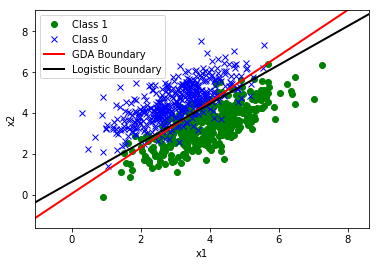

In [40]:
plot_comparison(x_train_2_gda, y_train_2_gda, theta_gda=np.insert(gda_2.theta, 0, gda_2.theta_0), theta_logistic=clf_2.theta)

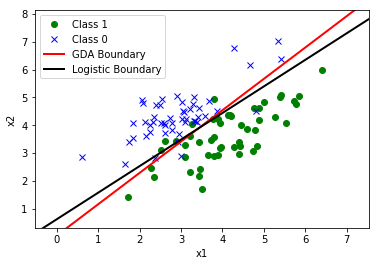

In [41]:
plot_comparison(x_valid_2_gda, y_valid_2_gda, theta_gda=np.insert(gda_2.theta, 0, gda_2.theta_0), theta_logistic=clf_2.theta)

In Dataset 1, We can see that the Accuracy and the Boundary line in both training set and validation set of Logistic Regression is much BETTER than GDA.
This happened because p(x|y) may not be Gaussian in some datapoints

## h. Theory problem

Using log or exponential function to reduce the affect of "NOT Gaussian" data